In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# criar pasta para salvar figuras/saídas
os.makedirs("data/outputs/figs", exist_ok=True)
os.makedirs("data/outputs/tables", exist_ok=True)

# carregar o arquivo tratado (antes do one-hot)
file_path = "data/processed/adult_final.csv"
df = pd.read_csv(file_path)

print("Arquivo carregado:", file_path)
print("Dimensões:", df.shape)
display(df.head())

Arquivo carregado: data/processed/adult_final.csv
Dimensões: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,>50K
4,18,?,103497.0,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Célula 2 — Estatísticas descritivas (resumo)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

summary = df[num_cols].agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max']).T
summary = summary.rename(columns={'var':'variance', 'std':'std_dev', 'median':'median'})
display(summary)

summary.to_csv("data/outputs/tables/adult_descriptive_stats.csv")
print("Resumo salvo em data/outputs/tables/adult_descriptive_stats.csv")

,count,mean,median,variance,std_dev,min,max
age,48842.0,38.437247,37.00,1.789065e+02,13.375595,17.0,78.0
fnlwgt,48842.0,179641.816214,178143.25,7.451351e+09,86321.206519,12285.0,417668.0
educational-num,48842.0,10.324106,10.00,4.835065e+00,2.198878,5.0,16.0
capital-gain,48842.0,0.000000,0.00,0.000000e+00,0.000000,0.0,0.0
capital-loss,48842.0,0.000000,0.00,0.000000e+00,0.000000,0.0,0.0
hours-per-week,48842.0,41.131792,40.00,1.218302e+01,3.490418,33.0,52.0


Resumo salvo em outputs/tables/adult_descriptive_stats.csv


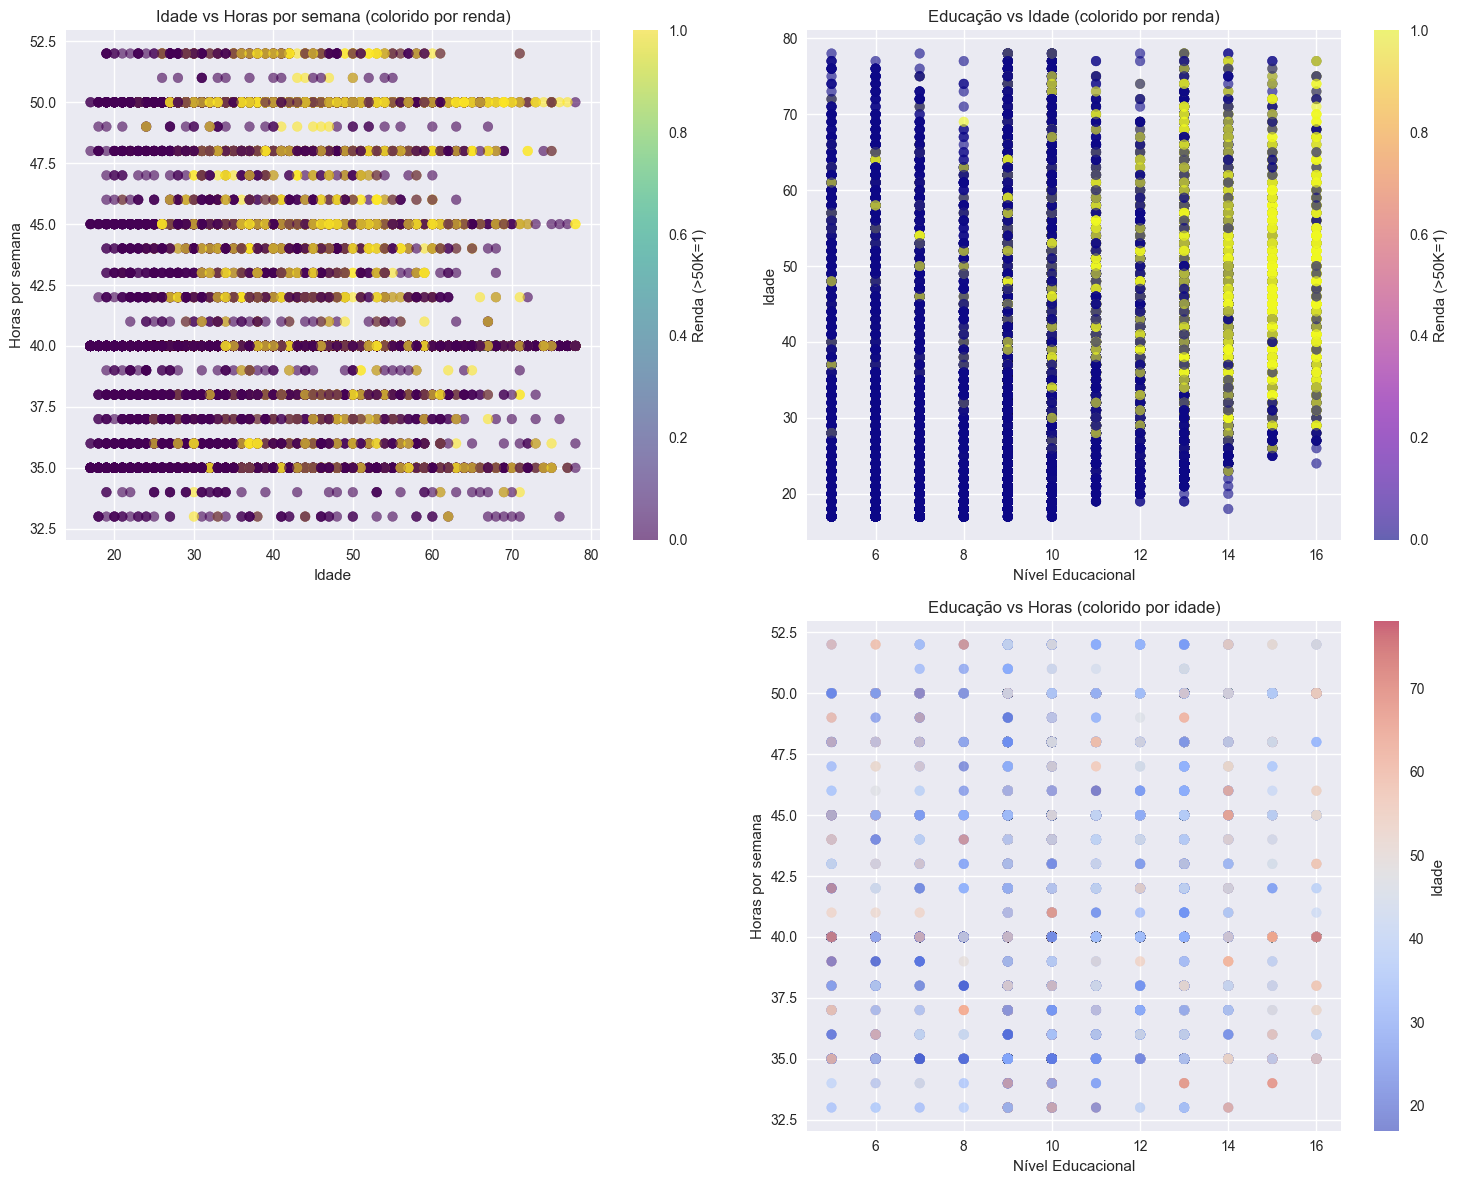

In [ ]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Idade vs Horas por semana
scatter1 = axes[0,0].scatter(df['age'], df['hours-per-week'], c=df['income'].map({'<=50K': 0, '>50K': 1}), alpha=0.6, cmap='viridis')
axes[0,0].set_xlabel('Idade')
axes[0,0].set_ylabel('Horas por semana')
axes[0,0].set_title('Idade vs Horas por semana (colorido por renda)')
plt.colorbar(scatter1, ax=axes[0,0], label='Renda (>50K=1)')

# Educação vs Idade
scatter2 = axes[0,1].scatter(df['educational-num'], df['age'], c=df['income'].map({'<=50K': 0, '>50K': 1}), alpha=0.6, cmap='plasma')
axes[0,1].set_xlabel('Nível Educacional')
axes[0,1].set_ylabel('Idade')
axes[0,1].set_title('Educação vs Idade (colorido por renda)')
plt.colorbar(scatter2, ax=axes[0,1], label='Renda (>50K=1)')

# Hours per week vs Educational num
scatter4 = axes[1,1].scatter(df['educational-num'], df['hours-per-week'], c=df['age'], alpha=0.6, cmap='coolwarm')
axes[1,1].set_xlabel('Nível Educacional')
axes[1,1].set_ylabel('Horas por semana')
axes[1,1].set_title('Educação vs Horas (colorido por idade)')
plt.colorbar(scatter4, ax=axes[1,1], label='Idade')

fig.delaxes(axes[1,0])

plt.tight_layout()
plt.savefig('data/outputs/figs/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

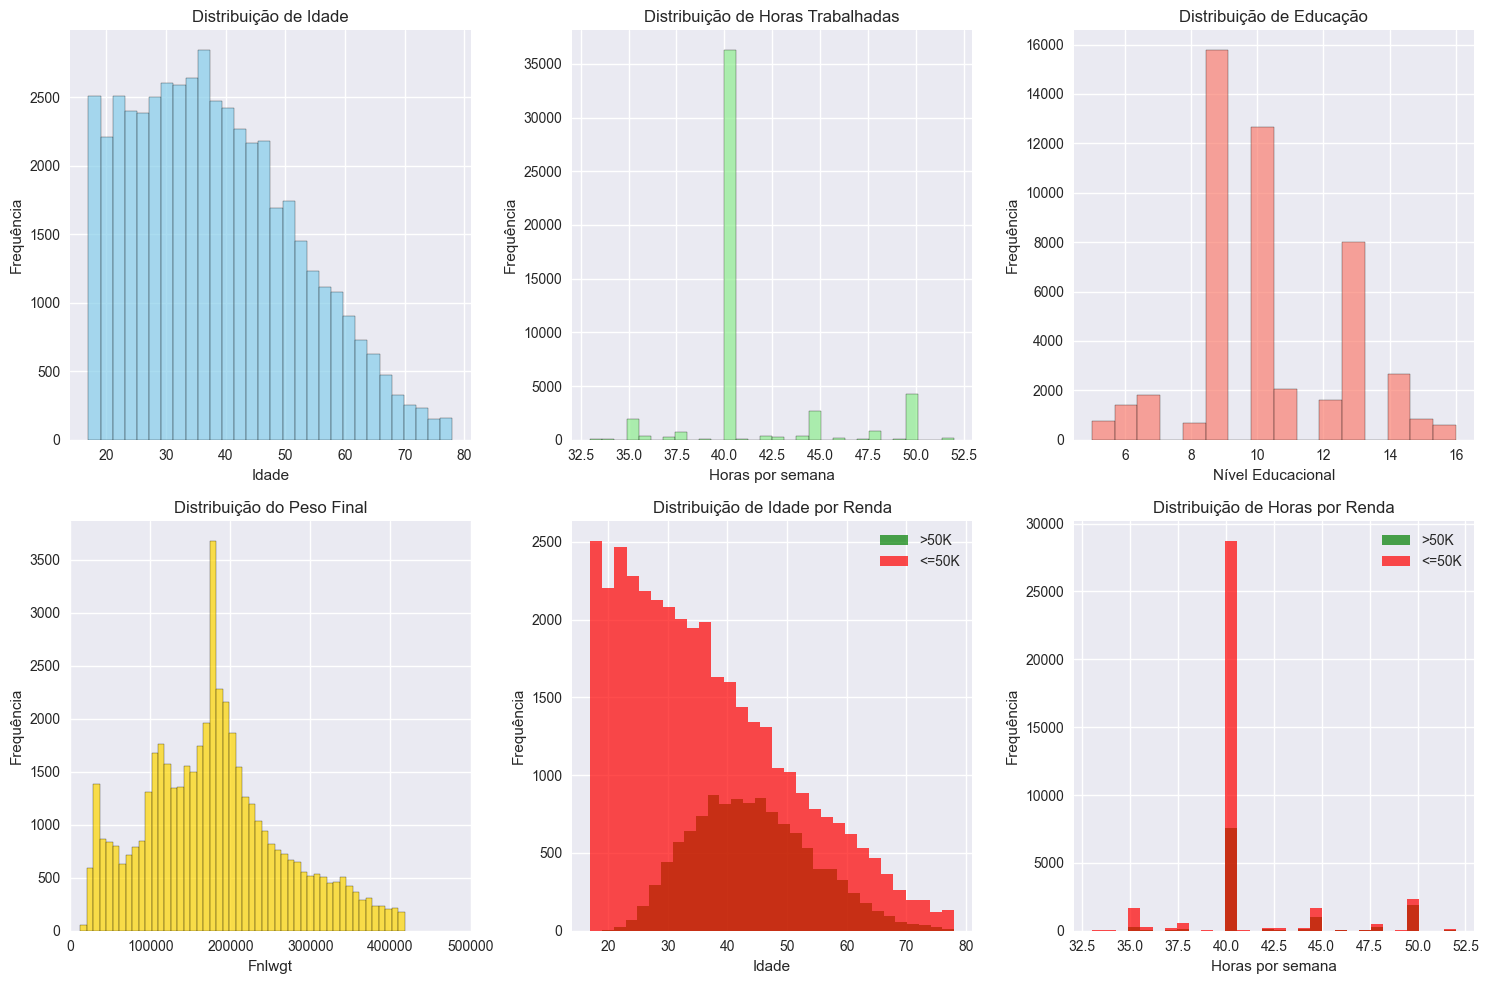

In [ ]:
# 2. HISTOGRAMAS 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograma de Idade
axes[0,0].hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Idade')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição de Idade')

# Histograma de Horas por semana
axes[0,1].hist(df['hours-per-week'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_xlabel('Horas por semana')
axes[0,1].set_ylabel('Frequência')
axes[0,1].set_title('Distribuição de Horas Trabalhadas')

# Histograma de Nível Educacional
axes[0,2].hist(df['educational-num'], bins=16, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_xlabel('Nível Educacional')
axes[0,2].set_ylabel('Frequência')
axes[0,2].set_title('Distribuição de Educação')

# Histograma de fnlwgt (peso final)
axes[1,0].hist(df['fnlwgt'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_xlabel('Fnlwgt')
axes[1,0].set_ylabel('Frequência')
axes[1,0].set_title('Distribuição do Peso Final')
axes[1,0].set_xlim(0, 500000)  

# Histogramas comparativos de idade por renda
df_high = df[df['income'] == '>50K']
df_low = df[df['income'] == '<=50K']

axes[1,1].hist(df_high['age'], bins=30, alpha=0.7, label='>50K', color='green')
axes[1,1].hist(df_low['age'], bins=30, alpha=0.7, label='<=50K', color='red')
axes[1,1].set_xlabel('Idade')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição de Idade por Renda')
axes[1,1].legend()

# Histogramas comparativos de horas por renda
axes[1,2].hist(df_high['hours-per-week'], bins=30, alpha=0.7, label='>50K', color='green')
axes[1,2].hist(df_low['hours-per-week'], bins=30, alpha=0.7, label='<=50K', color='red')
axes[1,2].set_xlabel('Horas por semana')
axes[1,2].set_ylabel('Frequência')
axes[1,2].set_title('Distribuição de Horas por Renda')
axes[1,2].legend()

plt.tight_layout()
plt.savefig('data/outputs/figs/histograms.png', dpi=300, bbox_inches='tight')
plt.show()

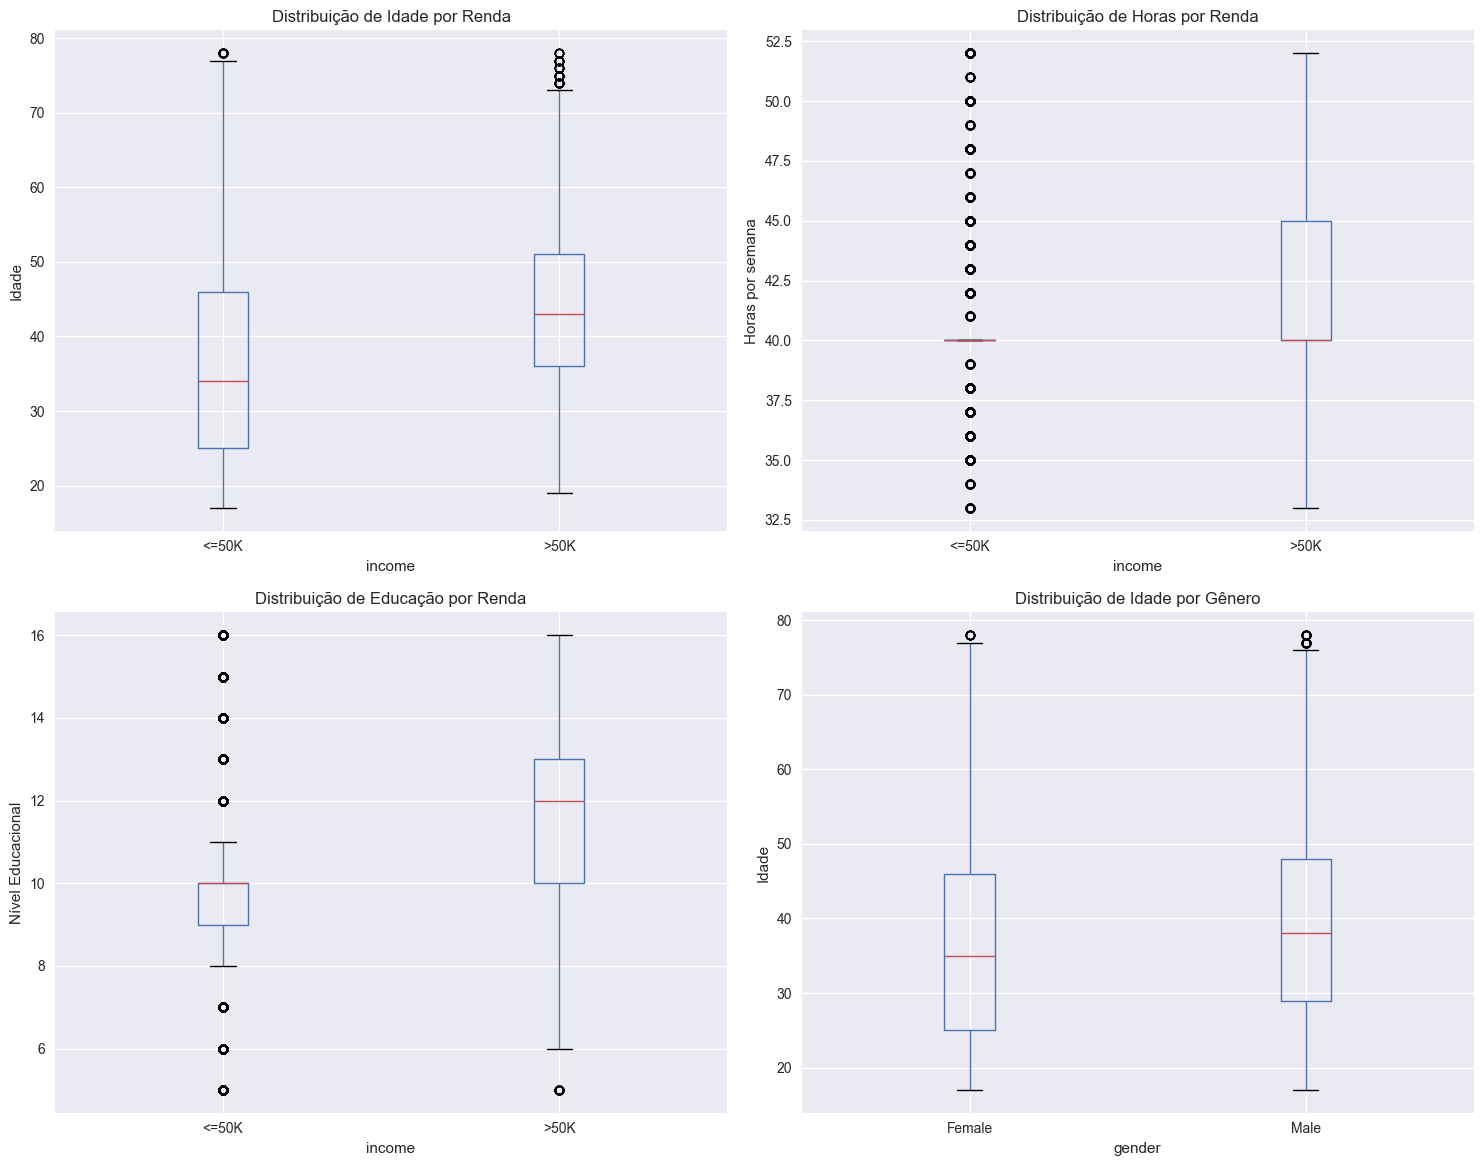

In [ ]:
# 3. BOXPLOTS 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot de Idade por Renda
df.boxplot(column='age', by='income', ax=axes[0,0])
axes[0,0].set_title('Distribuição de Idade por Renda')
axes[0,0].set_ylabel('Idade')

# Boxplot de Horas por semana por Renda
df.boxplot(column='hours-per-week', by='income', ax=axes[0,1])
axes[0,1].set_title('Distribuição de Horas por Renda')
axes[0,1].set_ylabel('Horas por semana')

# Boxplot de Educação por Renda
df.boxplot(column='educational-num', by='income', ax=axes[1,0])
axes[1,0].set_title('Distribuição de Educação por Renda')
axes[1,0].set_ylabel('Nível Educacional')

# Boxplot de Idade por Gênero
df.boxplot(column='age', by='gender', ax=axes[1,1])
axes[1,1].set_title('Distribuição de Idade por Gênero')
axes[1,1].set_ylabel('Idade')

plt.suptitle('')  
plt.tight_layout()
plt.savefig('data/outputs/figs/boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

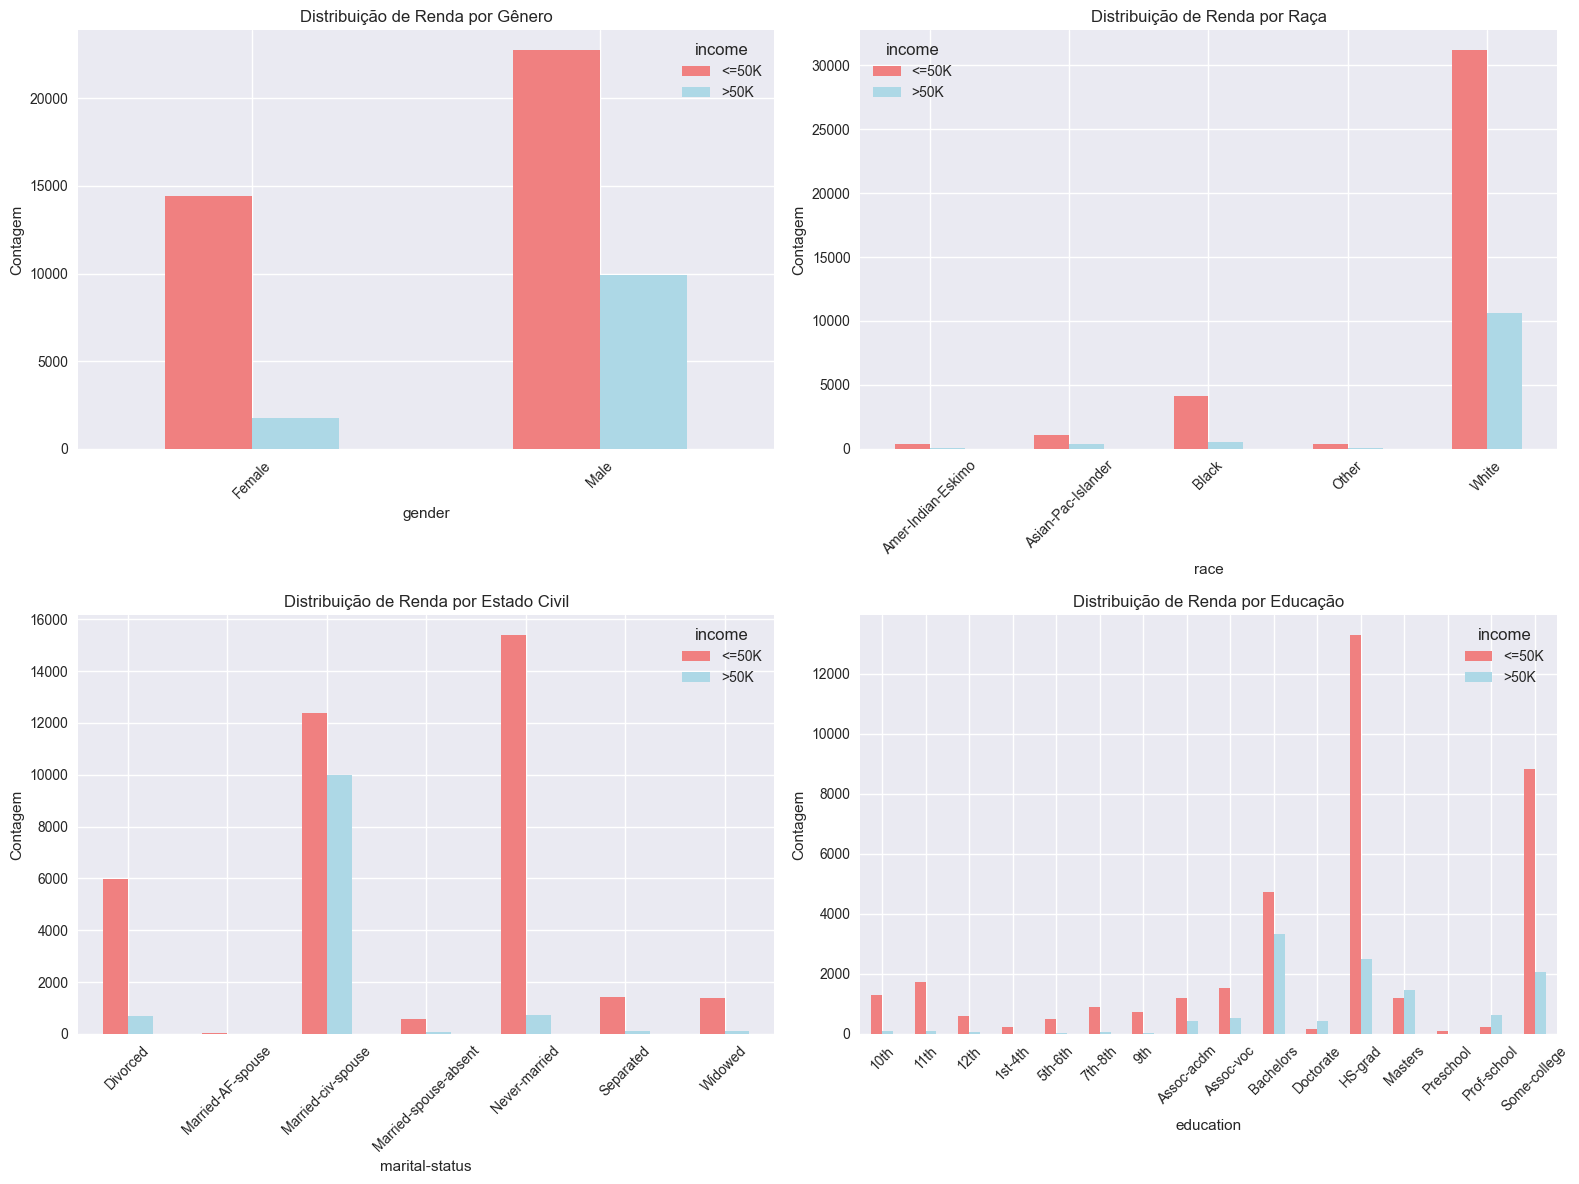

In [ ]:
# 4. GRÁFICOS DE BARRAS AGRUPADAS 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Renda por Gênero
gender_income = pd.crosstab(df['gender'], df['income'])
gender_income.plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'lightblue'])
axes[0,0].set_title('Distribuição de Renda por Gênero')
axes[0,0].set_ylabel('Contagem')
axes[0,0].tick_params(axis='x', rotation=45)

# Renda por Raça
race_income = pd.crosstab(df['race'], df['income'])
race_income.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue'])
axes[0,1].set_title('Distribuição de Renda por Raça')
axes[0,1].set_ylabel('Contagem')
axes[0,1].tick_params(axis='x', rotation=45)

# Renda por Estado Civil
marital_income = pd.crosstab(df['marital-status'], df['income'])
marital_income.plot(kind='bar', ax=axes[1,0], color=['lightcoral', 'lightblue'])
axes[1,0].set_title('Distribuição de Renda por Estado Civil')
axes[1,0].set_ylabel('Contagem')
axes[1,0].tick_params(axis='x', rotation=45)

# Renda por Educação
education_income = pd.crosstab(df['education'], df['income'])
education_income.plot(kind='bar', ax=axes[1,1], color=['lightcoral', 'lightblue'])
axes[1,1].set_title('Distribuição de Renda por Educação')
axes[1,1].set_ylabel('Contagem')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data/outputs/figs/grouped_bar_charts.png', dpi=300, bbox_inches='tight')
plt.show()

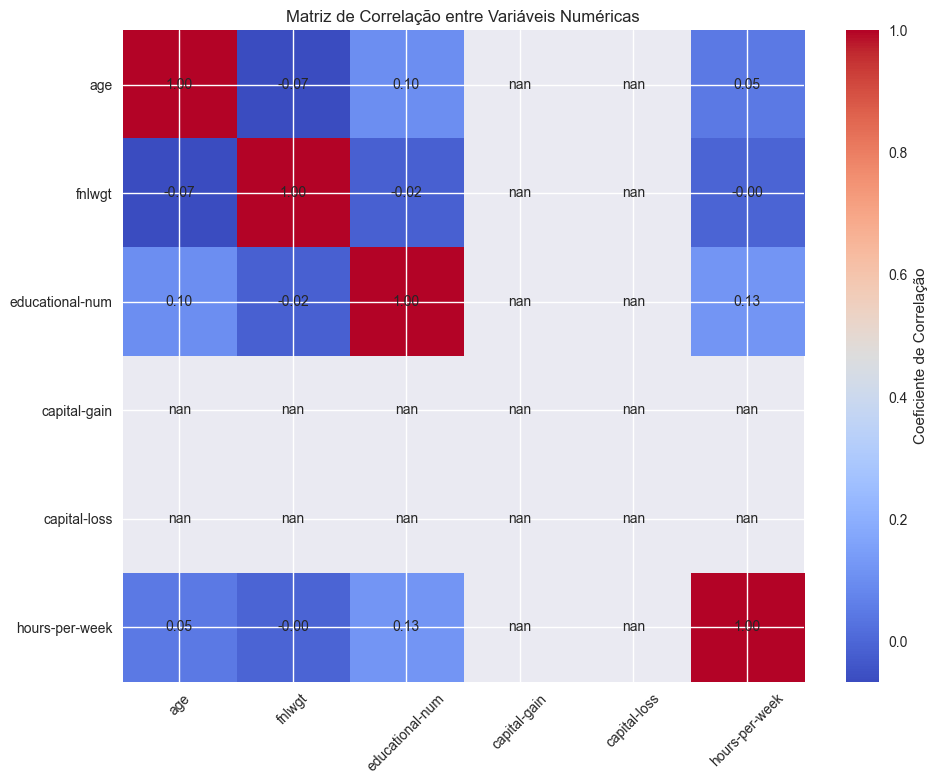

In [10]:
# 5. MATRIZ DE CORRELAÇÃO 
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(heatmap, label='Coeficiente de Correlação')
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação entre Variáveis Numéricas')

# Adicionar valores de correlação
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('data/outputs/figs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()